### Table of Contents

* [Chapter 1: Gather data](#chapter1)
    * [Section 1.1: The WeRankDogs Twitter archive](#section_1_1)
    * [Section 1.2: The tweet imgage predictions](#section_1_2)
    * [Section 1.3:The Twitter API data](#section_1_3)
        * [Section 1.3.1: Reading JSON data into Pandas dataframe](#section_1_3_1)
* [Chapter 2: Assess data](#chapter2)
    * [Section 2.1: WeRateDogs Twitter archive Assessment](#section_2_1)
        * [Section 2.1.1: WeRateDogs Twitter archive Quality Assessment](#section_2_1_1)
        * [Section 2.1.2: WeRateDogs Twitter archive Tidiness Assessment](#section_2_1_2)
    * [Section 2.2: Image prediction data Assessment](#section_2_2)
        * [Section 2.2.1: Image prediction data Quality Assessment](#section_2_2_1)
        * [Section 2.2.2: Image prediction data Tidiness Assessment](#section_2_2_2)
    * [Section 2.3: The Twitter API data Assessment](#section_2_3)
        * [Section 2.3.1: The Twitter API data Quality Assessment](#section_2_3_1)
        * [Section 2.3.2: The Twitter API data Tidiness Assessment](#section_2_3_2)
    * [Section 2.4: Assess data summary](#section_2_4)
        * [Section 2.4.1: Data quality issues summary](#section_2_4_1)
        * [Section 2.4.2: Data tidiness isuues summary](#section_2_4_2)
* [Chapter 3: Clean data](#chapter3)
    * [Section 3.1: Clean data quality issues](#section_3_1)
    * [Section 3.2: Clean data tidiness issues](#section_3_2)
* [Chapter 4: Analyze data](#chapter4)

### Imports

In [42]:
#Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import requests
import os
import tweepy
import json
import random
import time
import re 

# Chapter 1. Gather Data<a class="anchor" id="chapter1"></a>

## Section 1.1. The WeRateDogs Twitter archive <a class="anchor" id="section_1_1"></a>

The WeRateDogs Twitter archive. This file is provided by Udacity and downloaded manually by clicking on the provided link.

In [56]:
#Reading the WeRateDogs Twitter data from a csv file into a pandas dataframe
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv', sep=',')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Section 1.2. The tweet image predictions <a class="anchor" id="section_1_2"></a>

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [57]:
#Downloading the tweet image predictions programmatically using the provided URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [58]:
#Writing the downloaded response into a pandas df
with open('./image-predictions-3.tsv', 'wb') as file:
    file.write(response.content)
df_image_predictions = pd.read_csv('./image-predictions-3.tsv', sep='\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [78]:
df_image_predictions.to_csv('image_predictions.csv', index = False)

## Section 1.3. The Twitter API data <a class="anchor" id="section_1_3"></a>

Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [59]:
CONSUMER_KEY = 'q0GYYcW2omAPxLklz0UEcvZqG'
CONSUMER_SECRET = 'NbQZEvosoCnBP2591NlZvmQ4a0efLITQz9hvcA7eMlWjzg2jar'
OAUTH_TOKEN ='2910438674-COfGYyKSv28Tovu97sHh9iSkxE3aIbm6SWF8RKR'
OAUTH_TOKEN_SECRET = 'H2L2jDrTPbixbON2BdLCGtrGqpnkbAczYYttK3tRkIbvq'

In [60]:
#Using tweepy library, we set up Twitter API object and set rate limit parameters

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [61]:
# Creating a list of tweet ids from WeRateDogs Twitter archive enhanced dataset
tweet_ids = list(df_twitter_archive['tweet_id'].unique())
#tweet_ids = ['855860136149123072','855862651834028034','892421']
len(tweet_ids)

2356

In [62]:
for status in api.user_timeline():
    print (status.id)

1220159113797062657
1220159080666296320
847480101893799936
826806830735228928
826396255257522176
826388389909950464
826387730259124224
779342963466010624


In [63]:
tweet_count = 0

# Creating an empty list for tweets to append tweet information to
tweets_list = []

# creating a dictionary for tweets that return errors 
tweets_with_error = {}


# start time of execution
start_time = time.time()

# For loop which will add each available tweet JSON data to tweets_list
for ids in tweet_ids:
    
    tweet_count += 1
    try:
        # Getting the tweet's JSON data and appending it to the tweet list
        tweet = api.get_status(ids, tweet_mode = 'extended')
        tweets_list.append(tweet._json)
    except tweepy.TweepError as err:
        # save the error to the tweets with error dictionary for review
        #print("Tweet has error for id:  " + str(ids)) #commenting out since many tweets had error
        tweets_with_error[ids] = err
        pass
    # Only print tweet id for every 100th tweet to save space
    if tweet_count % 100 == 0:
        print("loop number " + str(tweet_count))
    
        
# end time for excution
end_time = time.time()

#printing time for execution
print("Total run time for the loop is:", end_time - start_time)

loop number 100
loop number 200
loop number 300
loop number 400
loop number 500
loop number 600
loop number 700
loop number 800
loop number 900


Rate limit reached. Sleeping for: 473


loop number 1000
loop number 1100
loop number 1200
loop number 1300
loop number 1400
loop number 1500
loop number 1600
loop number 1700
loop number 1800


Rate limit reached. Sleeping for: 488


loop number 1900
loop number 2000
loop number 2100
loop number 2200
loop number 2300
Total run time for the loop is: 2061.120843887329


In [64]:
len(tweets_list)

2331

In [65]:
len(tweets_with_error)

25

In [66]:
#Looking at the tweet ids that we were not able to retrieve JSON data for
tweets_with_error

{888202515573088257: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 873697596434513921: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 872668790621863937: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 872261713294495745: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 869988702071779329: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 866816280283807744: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 861769973181624320: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 856602993587888130: tweepy.error.TweepError([{'code': 144,
  

- Out of 2356 unique tweet ids, we were able to get the JSON data for 2331 and are missing the data for 25 tweets ids.

### Section 1.3.1: Reading JSON data into Pandas dataframe <a class="anchor" id="section_1_3_1"></a>

In [70]:
#Saving the JSON data that we have retrieved into a text file
tweets_json_data = 'tweet_json.txt'

with open(tweets_json_data, 'w') as outfile:
    for tweets_json in tweets_list:
        json.dump(tweets_json, outfile)
        outfile.write('\n')

In [68]:
ls tweet_json.txt

tweet_json.txt


In [76]:
#Reading the JSON data from the text file we just created into a Pandas dataframe
tweets_list = []

with open(tweets_json_data, 'r') as json_file:
    # reading the first line 
    line = json_file.readline()
    while line:
        data = json.loads(line)

        # extracting relevant fields from the JSON data
        tweet_id = data['tweet_id']
        tweet_retweet_count = data['retweet_count']
        tweet_favorite_count = data['favorite_count']
        
        # creating a dictionary with the JSON data for retweet count and favorite count, then adding it to a list
        tweet_json_dict = {'tweet_id': tweet_id, 
                     'retweet_count': tweet_retweet_count, 
                     'favorite_count': tweet_favorite_count
                    }
        tweets_list.append(tweet_json_dict)

        # reading the next line of JSON data
        line = json_file.readline()

        
# converting the tweets JSON data dictionary list to a DataFrame
df_tweet_json_data = pd.DataFrame(tweets_list, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

df_tweet_json_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7474,35387
1,892177421306343426,5546,30631
2,891815181378084864,3670,23037
3,891689557279858688,7646,38680
4,891327558926688256,8248,36963


In [77]:
#Saving the tweets JSON data into a csv file

df_tweet_json_data.to_csv('tweet_json_data.csv', index = False)

With this JSON data, we have all three pieces of inforation we need to move on to assess phase.

# Chapter 2. Assess Data<a class="anchor" id="chapter2"></a>

In [2]:
#Reading the data files that we gathered in the previous section into pandas dataframes
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv', sep=',')
df_image_predictions = pd.read_csv('image_predictions.csv', sep=',')
df_json_data = pd.read_csv('tweet_json_data.csv', sep=',')

In [81]:
#To make sure the files were loaded into dataframes properly, we will look at the first five rows of each dataframe
#Looking at twitter archive dataframe header
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [82]:
#looking at image prediction dataframe header
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [83]:
#looking at JSON additional data dataframe header
df_json_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7474,35387
1,892177421306343426,5546,30631
2,891815181378084864,3670,23037
3,891689557279858688,7646,38680
4,891327558926688256,8248,36963


## Section 2.1. WeRateDogs Twitter archive Assessment <a class="anchor" id="section_2_1"></a>

We will visually and programmatically assess the archive data here. We can take a quick visual assessment by looking at header and footer but because there are many fields and over 2000 rows, programmatic assessment is more efficient.

In [84]:
df_twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [85]:
df_twitter_archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [87]:
sum(df_twitter_archive.duplicated())
#There are no rows where all the columns are duplicated

0

In [88]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [117]:
2356-2297

59

In [92]:
df_twitter_archive['name'].value_counts().head(20)

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Lola        10
Tucker      10
Penny       10
Bo           9
Winston      9
the          8
Sadie        8
Bailey       7
Toby         7
Daisy        7
Buddy        7
an           7
Jack         6
Koda         6
Name: name, dtype: int64

In [99]:
#Looks like real names are all capitalized so we want to filter the name column to those that only contain lower case values
df_twitter_archive[df_twitter_archive['name'].str.contains('^[a-z]', regex = True)]['name'].value_counts()

a               55
the              8
an               7
very             5
one              4
quite            4
just             4
not              2
actually         2
getting          2
mad              2
unacceptable     1
officially       1
this             1
by               1
all              1
his              1
space            1
old              1
life             1
infuriating      1
such             1
light            1
incredibly       1
my               1
Name: name, dtype: int64

In [304]:
df_twitter_archive[df_twitter_archive['tweet_id']==666033412701032449]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [100]:
df_twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [101]:
df_twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [102]:
df_twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [103]:
df_twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [113]:
df_twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [116]:
len(df_twitter_archive[df_twitter_archive['rating_denominator']>10])

20

### Section 2.1.1. WeRateDogs Twitter archive quality Assessment <a class="anchor" id="section_2_1_1"></a>

Here are some of the quality issues found in Twitter archive data that we have identified and will address in clean section:
- 181 rows are actually retweets and not original tweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns are not null for these records).
- 78 rows are similarly replies and not original tweets (in_reply_to_status_id, in_reply_to_user_id fields are not null for these).
- There are 59 tweets that are missing expanded URL field.
- The timestamp column is in object (string) format instead of datetime.
- name column has 745 values as None which is most likely missing values. And there are other values that are not names such as 'a', 'the' for 55 rows.
- In several columns such as name, doggo, floofer, pupper, puppo, it is hard to identify missing values because they are None instead of null.
- We know from the project description that in WeRateDogs, denominator should be 10. However, there are 20 rows with denominator greater than 10.
-  source column can be cleaned up to be more readable.  There are only 4 main categories before the final "<\a>": Twitter for iPhone, Vine - Make a Scene, Twitter Web Client, and TweetDeck.

### Section 2.1.2. WeRateDogs Twitter archive tidiness Assessment <a class="anchor" id="section_2_1_2"></a>

Here are some of the tidiness issues found in Twitter archive data that we have identified and will address in clean section:
- There are 4 columns for dog stages (doggo, floofer, pupper, puppo). These are all different values for one variable and should be in one column.
- Columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id are not relevant to original tweets.

## Section 2.2. Image prediction data Assessment <a class="anchor" id="section_2_2"></a>

In [104]:
df_image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [105]:
df_image_predictions.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [106]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [107]:
df_image_predictions['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
EntleBucher             1
hare                    1
guenon                  1
four-poster             1
lynx                    1
Name: p1, Length: 378, dtype: int64

In [109]:
sum(df_image_predictions['p1'].isnull())

0

### Section 2.2.1. Image prediction data quality Assessment <a class="anchor" id="section_2_2_1"></a>

- There are a total of 2075 records in prediction data which means 281 tweets will be missing breed predictions.

### Section 2.2.2. Image prediction data tidiness Assessment <a class="anchor" id="section_2_2_2"></a>

- Columns p1, p2, p3 can be re-named to more meaningful names. That will help understand other columns such as p1_conf or p1_dog better as well.
- This dataset should be combined with Twitter archive data.

## Section 2.3. The Twitter API data Assessment <a class="anchor" id="section_2_3"></a>

In [110]:
df_json_data.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7474,35387
1,892177421306343426,5546,30631
2,891815181378084864,3670,23037
3,891689557279858688,7646,38680
4,891327558926688256,8248,36963
5,891087950875897856,2758,18629
6,890971913173991426,1792,10824
7,890729181411237888,16722,59631
8,890609185150312448,3814,25644
9,890240255349198849,6489,29257


In [111]:
df_json_data.tail(10)

,tweet_id,retweet_count,favorite_count
2321,666058600524156928,51,104
2322,666057090499244032,120,263
2323,666055525042405380,214,404
2324,666051853826850816,752,1099
2325,666050758794694657,51,122
2326,666049248165822465,39,96
2327,666044226329800704,124,265
2328,666033412701032449,39,109
2329,666029285002620928,41,119
2330,666020888022790149,449,2355


In [112]:
df_json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


### Section 2.3.1. The Twitter API data quality Assessment <a class="anchor" id="section_2_3_1"></a>

- 25 tweet ids at the time this code was run, were either deleted or set to private and are missing. 

### Section 2.3.2. The Twitter API data tidiness Assessment <a class="anchor" id="section_2_3_2"></a>

- This dataset should be combined with Twitter archive data.

## Section 2.4. Assess Data Summary <a class="anchor" id="section_2_4"></a>

### Section 2.4.1. Quality assessment summary <a class="anchor" id="section_2_4_1"></a>

1. 181 rows are actually retweets and not original tweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns are not null for these records).
2. 78 rows are similarly replies and not original tweets (in_reply_to_status_id, in_reply_to_user_id fields are not null for these).
3. There are 59 tweets that are missing expanded URL field.
4. source column can be cleaned up to be more readable.  There are only 4 main categories before the final "<\a>": Twitter for iPhone, Vine - Make a Scene, Twitter Web Client, and TweetDeck.
5. The timestamp column is in object (string) format instead of datetime.
6. In several columns such as name, doggo, floofer, pupper, puppo, it is hard to identify missing values because they are None instead of null.
7. name column has 745 values as None which is most likely missing values. And there are other values that are not names such as 'a', 'the' for 55 rows.
8. We know from the project description that in WeRateDogs, denominator should be 10. However, there are 20 rows with denominator greater than 10.
9. 25 tweet ids at the time this code was run, were either deleted or set to private and are missing. They are missing favorite and retweet count. This will be addressed after all dataframes are joined.
10. There are some extreme numerators which are either false or group dog photos. Better to limit to a maximum of 15.


### Section 2.4.2. Tidiness assessment summary <a class="anchor" id="section_2_4_2"></a>

1. Columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id are not relevant to original tweets.
2. There are 4 columns for dog stages (doggo, floofer, pupper, puppo). These are all different values for one variable and should be in one column.
3. Columns p1, p2, p3 can be refined into one prediction to more meaningful. Same thing for other columns such as p1_conf or p1_dog better as well.
4. All three dataframes should be merged into one dataframe that contains all relevant information.

# Chapter 3. Clean Data<a class="anchor" id="chapter3"></a>

## Section 3.1. Clean data quality issues <a class="anchor" id="section_3_1"></a>

In [387]:
#making copies of dataframes for cleaning 
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_json_data_clean = df_json_data.copy()

**Issue 1:** 181 rows are actually retweets and not original tweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns are not null for these records).

**Define:** remove 181 rows that are retweets.

#### Code

In [388]:
#The following rows are retweets that should be removed
df_twitter_archive_clean[~df_twitter_archive_clean['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [389]:
#removing retweet rows
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean['retweeted_status_id'].isnull()]

#### Test

In [390]:
#making sure all retweet rows are removes - this should be empty
df_twitter_archive_clean[~df_twitter_archive_clean['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [391]:
len(df_twitter_archive_clean)

2175

**Issue 2:** 78 rows are replies and not original tweets (in_reply_to_status_id, in_reply_to_user_id fields are not null for these).

**Define:** remove 78 rows that are replies.

#### Code

In [392]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean['in_reply_to_status_id'].isnull()]

#### Test

In [393]:
#This should be null
df_twitter_archive_clean[~df_twitter_archive_clean['in_reply_to_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [394]:
len(df_twitter_archive_clean)

2097

**Issue 3:** There are 59 tweets that are missing expanded URL field.

In [395]:
#After the previous cleaning, there is only 3 left
df_twitter_archive_clean[df_twitter_archive_clean['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


**Define:** remove the remaining 3 rows with missing expanded URL..

#### Code

In [396]:
df_twitter_archive_clean = df_twitter_archive_clean[~df_twitter_archive_clean['expanded_urls'].isnull()]

#### Test

In [397]:
#This should be null
df_twitter_archive_clean[df_twitter_archive_clean['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**issue 4:** source column can be cleaned up to be more readable. There are only 4 main categories before the final "<\a>": Twitter for iPhone, Vine - Make a Scene, Twitter Web Client, and TweetDeck.

**Define:** Extract the portion of the column  between <a href=""> and </a> and replace the original part with this short, readable portion.

#### Code

In [398]:
df_twitter_archive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1962
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [399]:
df_twitter_archive_clean['source'] = df_twitter_archive_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

#### Test

In [400]:
#Looking at source column
df_twitter_archive_clean['source'].value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

In [401]:
df_twitter_archive_clean['source'].head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

**issue 5:** The timestamp column is in object (string) format instead of datetime.

**Define:** Convert timestamp column from string to datetime using Pandas pd.to_datetime

#### Code

In [402]:
df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive_clean['timestamp'])

#### Test

In [403]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null datetime64[ns, UTC]
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
doggo                         2094 non-null object
floofer                       2094 non-null object
pupper                        2094 non-null object
puppo                         2094 non-null object
dtypes: datetime64[ns, UTC]

In [404]:
df_twitter_archive_clean['timestamp'].head(10)

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
5   2017-07-29 00:08:17+00:00
6   2017-07-28 16:27:12+00:00
7   2017-07-28 00:22:40+00:00
8   2017-07-27 16:25:51+00:00
9   2017-07-26 15:59:51+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

**issue 6:** In several columns such as doggo, floofer, pupper, puppo, it is hard to identify missing values because they are None instead of null

**Define:** Convert 'None' to None to be able to filter null values.

#### Code

In [405]:
df_twitter_archive_clean[df_twitter_archive_clean['doggo'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [365]:
df_twitter_archive_clean.loc[df_twitter_archive_clean['doggo'] == 'None', 'doggo'] = None
df_twitter_archive_clean.loc[df_twitter_archive_clean['floofer'] == 'None', 'floofer'] = None
df_twitter_archive_clean.loc[df_twitter_archive_clean['pupper'] == 'None', 'pupper'] = None
df_twitter_archive_clean.loc[df_twitter_archive_clean['puppo'] == 'None', 'puppo'] = None

In [366]:
#We should now be able to get rows with null for these columns
df_twitter_archive_clean[df_twitter_archive_clean['doggo'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [367]:
#We can now see the last 5 columns have missing values
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null datetime64[ns, UTC]
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
doggo                         83 non-null object
floofer                       10 non-null object
pupper                        229 non-null object
puppo                         24 non-null object
dtypes: datetime64[ns, UTC](1), fl

**issue 7:** name column has 745 values as None which is most likely missing values (this was fixed in previous cleaning). And there are other values that are not names such as 'a', 'the' for 55 rows.

**Define:** Replace all the names that are lowercase with None so they can be dropped when filtering on null.

#### Code

In [406]:
df_twitter_archive_clean['name'].value_counts()

None       600
a           55
Charlie     11
Lucy        11
Cooper      10
          ... 
Pip          1
Alfy         1
Odin         1
Rorie        1
Ralphé       1
Name: name, Length: 955, dtype: int64

In [407]:
df_twitter_archive_clean.loc[df_twitter_archive_clean['name'].str.contains('^[a-z]', regex = True), 'name'] = None
df_twitter_archive_clean.loc[df_twitter_archive_clean['name']=='None', 'name'] = None

#### Test

In [408]:
#We should not see string None or those lowercase names anymore
df_twitter_archive_clean['name'].value_counts().sort_values(ascending = False)

Charlie    11
Lucy       11
Cooper     10
Oliver     10
Tucker      9
           ..
Amélie      1
Trevith     1
Noosh       1
Timmy       1
Lulu        1
Name: name, Length: 929, dtype: int64

In [409]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null datetime64[ns, UTC]
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          1390 non-null object
doggo                         2094 non-null object
floofer                       2094 non-null object
pupper                        2094 non-null object
puppo                         2094 non-null object
dtypes: datetime64[ns, UTC]

**issue 8:** We know from the project description that in WeRateDogs, denominator should be 10. However, there are 20 rows with denominator greater than 10.

**Define:** Drop the rows where rating_denominator is not equal to 10.

#### Code

In [410]:
df_twitter_archive_clean['rating_denominator'].value_counts()

10     2077
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [411]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean['rating_denominator']==10]

#### Test

In [412]:
df_twitter_archive_clean['rating_denominator'].value_counts()

10    2077
Name: rating_denominator, dtype: int64

**issue 10:** There are some extreme numerators which are either false or group dog photos. Better to limit to a maximum of 15.

**Define:** Drop the rows where rating_numerator greater than.

#### Code

In [413]:
df_twitter_archive_clean['rating_numerator'].value_counts()

12      485
10      434
11      413
13      287
9       152
8        98
7        51
14       38
5        34
6        32
3        19
4        15
2         9
1         4
75        1
420       1
26        1
27        1
1776      1
0         1
Name: rating_numerator, dtype: int64

In [414]:
df_twitter_archive_clean[df_twitter_archive_clean['rating_numerator']>15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00+00:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33+00:00,Twitter for iPhone,After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In [415]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean['rating_numerator']<=15]

#### Test

In [416]:
#This should be empty
df_twitter_archive_clean[df_twitter_archive_clean['rating_numerator']>15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## Section 3.2. Clean data tidiness issues <a class="anchor" id="section_3_2"></a>

**issue 1:** Columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id are not relevant to original tweets.

**Define:** drop irrelevant columns.

#### Code

In [417]:
df_twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [418]:
df_twitter_archive_clean = df_twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

#### Test

In [419]:
df_twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**issue 2:** There are 4 columns for dog stages (doggo, floofer, pupper, puppo). These are all different values for one variable and should be in one column.

**Define:** Create a new column for dog life stage melting four existing columns: 'doggo', 'floofer', 'pupper' and 'puppo'.

#### Code

In [296]:
df_twitter_archive_clean = pd.melt(df_twitter_archive_clean, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls','rating_numerator','rating_denominator',\
                                                                     'name'],
                           var_name='dog_life_stage', value_name='stage')

In [299]:
#drop the column stage
df_twitter_archive_clean = df_twitter_archive_clean.drop(['stage'], axis=1)

#### Test

In [297]:
df_twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_life_stage,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,doggo,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,doggo,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,doggo,None


In [298]:
len(df_twitter_archive_clean)

8288

#### Something is wrong here since the length suddenly increased to 8288

In [302]:
df_twitter_archive_clean[df_twitter_archive_clean['tweet_id'].duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_life_stage
2072,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,floofer
2073,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,floofer
2074,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,floofer
2075,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,floofer
2076,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,floofer
...,...,...,...,...,...,...,...,...,...
8283,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,puppo
8284,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,puppo
8285,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,puppo
8286,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,puppo


In [303]:
df_twitter_archive_clean[df_twitter_archive_clean['tweet_id']==666033412701032449]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_life_stage
2069,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,doggo
4141,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,floofer
6213,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,pupper
8285,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,puppo


#### These are the tweets with no life stage

#### Trying a slightly different method to address this issue

In [420]:
df_twitter_archive_clean[df_twitter_archive_clean['tweet_id']==666033412701032449]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2353,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,None,None,None


In [421]:
# replacing the stage value with 1, and where it is None with 0 to act as a dummy variable

df_twitter_archive_clean['doggo'] = df_twitter_archive_clean['doggo'].apply(lambda x: 0 if x=='None' else 1)
df_twitter_archive_clean['floofer'] = df_twitter_archive_clean['floofer'].apply(lambda x: 0 if x=='None' else 1)
df_twitter_archive_clean['pupper'] = df_twitter_archive_clean['pupper'].apply(lambda x: 0 if x=='None' else 1)
df_twitter_archive_clean['puppo'] = df_twitter_archive_clean['puppo'].apply(lambda x: 0 if x=='None' else 1)

# Looking at how many stages are None and how many have values
df_twitter_archive_clean['None'] = df_twitter_archive_clean['doggo'] + df_twitter_archive_clean['floofer'] + df_twitter_archive_clean['pupper'] + df_twitter_archive_clean['puppo']


df_twitter_archive_clean['None'].value_counts()

0    1738
1     323
2      11
Name: None, dtype: int64

In [422]:
# Setting life stage to 1 when it's None 
df_twitter_archive_clean['None'] = df_twitter_archive_clean['None'].apply(lambda x: 1 if x == 0 else 0)

# Ordering the life stages in this order: floofer, puppo, doggo and pupper
life_stage = ['floofer', 'puppo', 'doggo', 'pupper', 'None']

# setting conditions for selecting the dog life stage based on count 
conditions = [
    (df_twitter_archive_clean[life_stage[0]] == 1),
    (df_twitter_archive_clean[life_stage[1]] == 1),
    (df_twitter_archive_clean[life_stage[2]] == 1),
    (df_twitter_archive_clean[life_stage[3]] == 1),
    (df_twitter_archive_clean[life_stage[4]] == 1)]

# Setting the dog life stage value according to the first successful condition. Life_stage[4] is None
df_twitter_archive_clean['life_stage'] = np.select(conditions, life_stage, default = life_stage[4])

df_twitter_archive_clean.drop(life_stage, axis = 1, inplace = True)

# Setting the data type for life_stage as category
df_twitter_archive_clean['life_stage'] = df_twitter_archive_clean['life_stage'].astype('category')

##Adding the original source for this algorithm: https://code.i-harness.com/en/q/19c9fbc

#### Test

In [424]:
df_twitter_archive_clean.head(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,life_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None
6,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
7,890729181411237888,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None
8,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
9,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [425]:
df_twitter_archive_clean['life_stage'].value_counts()

None       1738
pupper      219
doggo        81
puppo        24
floofer      10
Name: life_stage, dtype: int64

**issue 3:** Columns p1, p2, p3 can be refined into one prediction to more meaningful. Same thing for other columns such as p1_conf or p1_dog better as well.

**Define:** Write a function to create one prediction and one confidence from ps and p_confs and p_dogs. Remove the old columns after adding the prediction and confidence columns. 

#### Code

In [426]:
df_image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [427]:
breed_prediction = []
prediction_confidence = []

def build_prediction_confidence_cols(col1,col2,col3,col4,col5,col6,col7,col8,col9):
    '''
    This function gets 9 columns  and checks their values and adds to two lists prediction and confidence based on those values.
    '''
    if col1 == True:
        breed_prediction.append(col2)
        prediction_confidence.append(col3)
    elif col4 == True:
        breed_prediction.append(col5)
        prediction_confidence.append(col6)
    elif col7 == True:
        breed_prediction.append(col8)
        prediction_confidence.append(col9)
    else:
        breed_prediction.append(None)
        prediction_confidence.append(0)


In [428]:
list(map(build_prediction_confidence_cols,df_image_predictions_clean['p1_dog'],\
                                                                           df_image_predictions_clean['p1'], df_image_predictions_clean['p1_conf'],\
                                                                           df_image_predictions_clean['p2_dog'],\
                                                                           df_image_predictions_clean['p2'], df_image_predictions_clean['p2_conf'],
                                                                           df_image_predictions_clean['p3_dog'],\
                                                                           df_image_predictions_clean['p3'], df_image_predictions_clean['p3_conf']))

df_image_predictions_clean['prediction'] = breed_prediction
df_image_predictions_clean['confidence'] = prediction_confidence

In [429]:
#drop unnecessary columns
df_image_predictions_clean = df_image_predictions_clean.drop(['p1','p1_dog','p1_conf','p2','p2_dog','p2_conf','p3','p3_dog','p3_conf'],axis=1)

#### Test

In [430]:
df_image_predictions_clean.head()

,tweet_id,jpg_url,img_num,prediction,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


**issue 4:** All three dataframes should be merged into one dataframe that contains all relevant information.

**Define:** Join all three dataframes using Pandas merge. Save the final dataframe into a csv.

#### Code

In [431]:
df_twitter_archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,life_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None


In [432]:
df_image_predictions_clean.head(2)

,tweet_id,jpg_url,img_num,prediction,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826


In [433]:
df_json_data_clean.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7474,35387
1,892177421306343426,5546,30631


##### A few last quality fixes first - There are still some columns that are not very helpful for analysis that is intended in the next section. Removing expanded_urls, rating_denominator, jpg_url, img_num


In [434]:
df_twitter_archive_clean = df_twitter_archive_clean.drop(['expanded_urls','rating_denominator'], axis=1)
df_image_predictions_clean = df_image_predictions_clean.drop(['jpg_url','img_num'], axis=1)

In [435]:
df_twitter_archive_clean.head(2)

,tweet_id,timestamp,source,text,rating_numerator,name,life_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,Tilly,None


In [436]:
df_image_predictions_clean.head(2)

,tweet_id,prediction,confidence
0,666020888022790149,Welsh_springer_spaniel,0.465074
1,666029285002620928,redbone,0.506826


In [437]:
len(df_image_predictions_clean)

2075

In [438]:
df_twitter_archive_clean.dtypes

tweet_id                          int64
timestamp           datetime64[ns, UTC]
source                           object
text                             object
rating_numerator                  int64
name                             object
life_stage                     category
dtype: object

In [439]:
df_twitter_archive_clean[df_twitter_archive_clean['tweet_id']==666029285002620928]

,tweet_id,timestamp,source,text,rating_numerator,name,life_stage
2354,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,None,None


In [440]:
len(df_twitter_archive_clean)

2072

In [441]:
df_image_predictions_clean.dtypes

tweet_id        int64
prediction     object
confidence    float64
dtype: object

In [442]:
#Combing archive data and prediction data
df_archive_prediction = pd.merge(df_twitter_archive_clean, df_image_predictions_clean, left_on=['tweet_id'], right_on=['tweet_id'], how='left')

In [444]:
df_archive_prediction

,tweet_id,timestamp,source,text,rating_numerator,name,life_stage,prediction,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,Phineas,None,None,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,Tilly,None,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,Archie,None,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,Darla,None,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,Franklin,None,basset,0.555712
...,...,...,...,...,...,...,...,...,...
2067,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,None,None,miniature_pinscher,0.560311
2068,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,None,None,Rhodesian_ridgeback,0.408143
2069,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,None,None,German_shepherd,0.596461
2070,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,None,None,redbone,0.506826


In [445]:
#Combing archive data and prediction data with API data
df_twitter_archive_master = pd.merge(df_archive_prediction, df_json_data_clean, left_on=['tweet_id'], right_on=['tweet_id'], how='left')

In [446]:
df_twitter_archive_master

,tweet_id,timestamp,source,text,rating_numerator,name,life_stage,prediction,confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,Phineas,None,None,0.000000,7474.0,35387.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,Tilly,None,Chihuahua,0.323581,5546.0,30631.0
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,Archie,None,Chihuahua,0.716012,3670.0,23037.0
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,Darla,None,Labrador_retriever,0.168086,7646.0,38680.0
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,Franklin,None,basset,0.555712,8248.0,36963.0
...,...,...,...,...,...,...,...,...,...,...,...
2067,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,None,None,miniature_pinscher,0.560311,39.0,96.0
2068,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,None,None,Rhodesian_ridgeback,0.408143,124.0,265.0
2069,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,None,None,German_shepherd,0.596461,39.0,109.0
2070,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,None,None,redbone,0.506826,41.0,119.0


In [447]:
df_twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

In [448]:
ls *.csv

image_predictions.csv         twitter-archive-enhanced.csv
tweet_json_data.csv           twitter_archive_master.csv


# Chapter 4. Analyze Data<a class="anchor" id="chapter4"></a>

In [2]:
df_twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [15]:
df_twitter_archive_master.head()

,tweet_id,timestamp,source,text,rating_numerator,name,life_stage,prediction,confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,Phineas,None,NaN,0.000000,7474.0,35387.0
1,892177421306343426,2017-08-01,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,Tilly,None,Chihuahua,0.323581,5546.0,30631.0
2,891815181378084864,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,Archie,None,Chihuahua,0.716012,3670.0,23037.0
3,891689557279858688,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,Darla,None,Labrador_retriever,0.168086,7646.0,38680.0
4,891327558926688256,2017-07-29,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,Franklin,None,basset,0.555712,8248.0,36963.0


In [14]:
df_twitter_archive_master['timestamp'] = pd.to_datetime(df_twitter_archive_master['timestamp'] ).apply(lambda x: x.date())

## 1. How is the number of original tweets and favorite counts changing over time?
I would like to take a look at the time series of tweet counts and favorite counts from 2015-2017 that we have the data for. I am curious to see if WeRateDogs got more and more active users or if some similar accounts appeared and stole some of their followers.

In [33]:
tweets_by_date = df_twitter_archive_master.groupby(df_twitter_archive_master['timestamp']).agg({'tweet_id': lambda x: x.nunique()}).reset_index()

In [34]:
tweets_by_date.head()

,timestamp,tweet_id
0,2015-11-15,3
1,2015-11-16,24
2,2015-11-17,15
3,2015-11-18,17
4,2015-11-19,23


In [35]:
tweets_by_date = tweets_by_date.rename({'tweet_id':'total_tweets'}, axis=1)

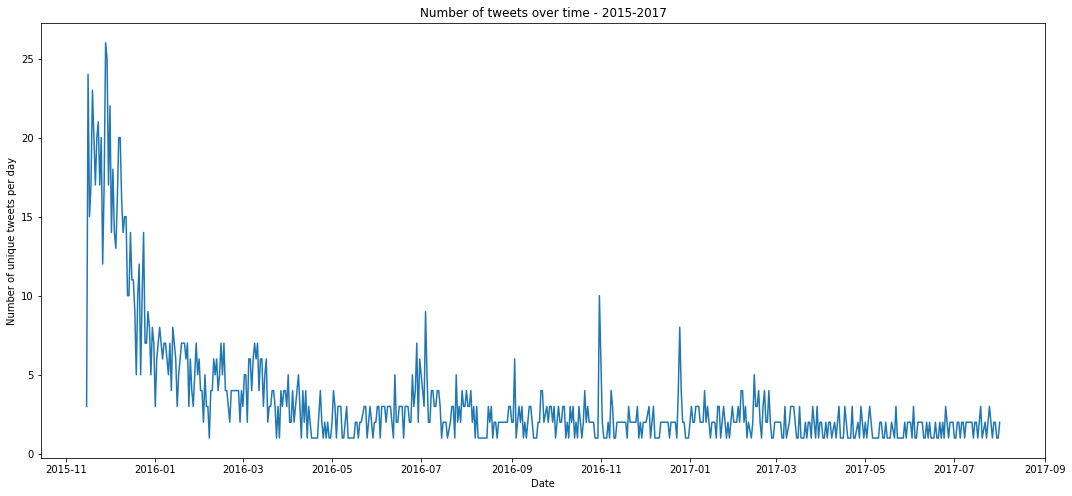

In [125]:
plt.figure(figsize=(18,8)) 
plt.plot(tweets_by_date['timestamp'], tweets_by_date['total_tweets'])
plt.xlabel('Date')
plt.ylabel('Number of unique tweets per day')
plt.title('Number of tweets over time - 2015-2017')
plt.show()

plt.savefig('tweet_count_time_series.png')

In [30]:
retweet_by_date = df_twitter_archive_master.groupby(df_twitter_archive_master['timestamp']).agg({'retweet_count': 'sum'}).reset_index()
retweet_by_date = retweet_by_date.rename({'retweet_count':'total_retweets'}, axis=1)

In [31]:
retweet_by_date

,timestamp,total_retweets
0,2015-11-15,529.0
1,2015-11-16,9064.0
2,2015-11-17,1946.0
3,2015-11-18,3406.0
4,2015-11-19,27478.0
...,...,...
593,2017-07-28,18514.0
594,2017-07-29,11006.0
595,2017-07-30,7646.0
596,2017-07-31,3670.0


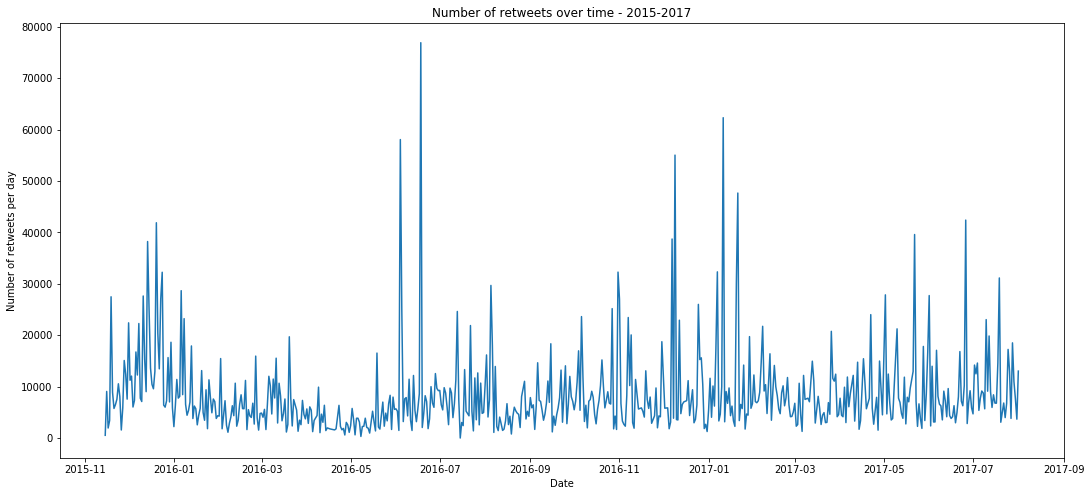

In [127]:
plt.figure(figsize=(18,8)) 
plt.plot(retweet_by_date['timestamp'], retweet_by_date['total_retweets'])
plt.xlabel('Date')
plt.ylabel('Number of retweets per day')
plt.title('Number of retweets over time - 2015-2017')
plt.show()

plt.savefig('retweet_count_time_series.png')

In [52]:
favorite_by_date = df_twitter_archive_master.groupby(df_twitter_archive_master['timestamp']).agg({'favorite_count': 'sum'}).reset_index()
favorite_by_date = favorite_by_date.rename({'favorite_count':'total_favorites'}, axis=1)

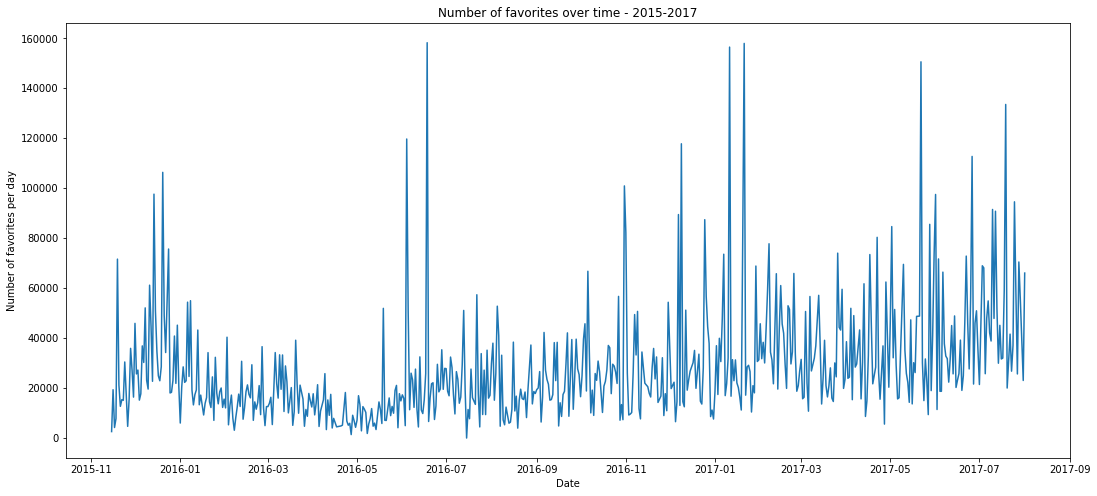

In [128]:
plt.figure(figsize=(18,8)) 
plt.plot(favorite_by_date['timestamp'], favorite_by_date['total_favorites'])
plt.xlabel('Date')
plt.ylabel('Number of favorites per day')
plt.title('Number of favorites over time - 2015-2017')
plt.show()

plt.savefig('favorite_count_time_series.png')

## 2. What are the top breeds by number of retweets and favorites?
What are the top ten breeds that receimost retweets and favorites.

In [76]:
top_breed_favorites = df_twitter_archive_master.groupby('prediction').agg({'favorite_count':'sum'}).reset_index()
top_breed_favorites = top_breed_favorites.rename({'favorite_count':},'total_favorites'axis=1)

In [83]:
top_10_favorite_breeds = top_breed_favorites.sort_values('total_favorites', ascending=False).head(11)
top_10_favorite_breeds

,prediction,total_favorites
88,golden_retriever,1725282.0
37,Labrador_retriever,1086366.0
49,Pembroke,948643.0
16,Chihuahua,665430.0
23,French_bulldog,550978.0
55,Samoyed,505024.0
81,chow,405916.0
82,cocker_spaniel,370215.0
100,pug,341946.0
94,malamute,319781.0


In [81]:
top_breed_retweets = df_twitter_archive_master.groupby('prediction').agg({'retweet_count':'sum'}).reset_index()
top_breed_retweets = top_breed_retweets.rename({'retweet_count':'total_retweets'},axis=1)

In [84]:
top_10_retweeted_breeds = top_breed_retweets.sort_values('total_retweets', ascending=False).head(11)
top_10_retweeted_breeds

,prediction,total_retweets
88,golden_retriever,491192.0
37,Labrador_retriever,332331.0
49,Pembroke,251128.0
16,Chihuahua,207576.0
55,Samoyed,165394.0
23,French_bulldog,140325.0
82,cocker_spaniel,126215.0
81,chow,112976.0
100,pug,100489.0
107,toy_poodle,94798.0


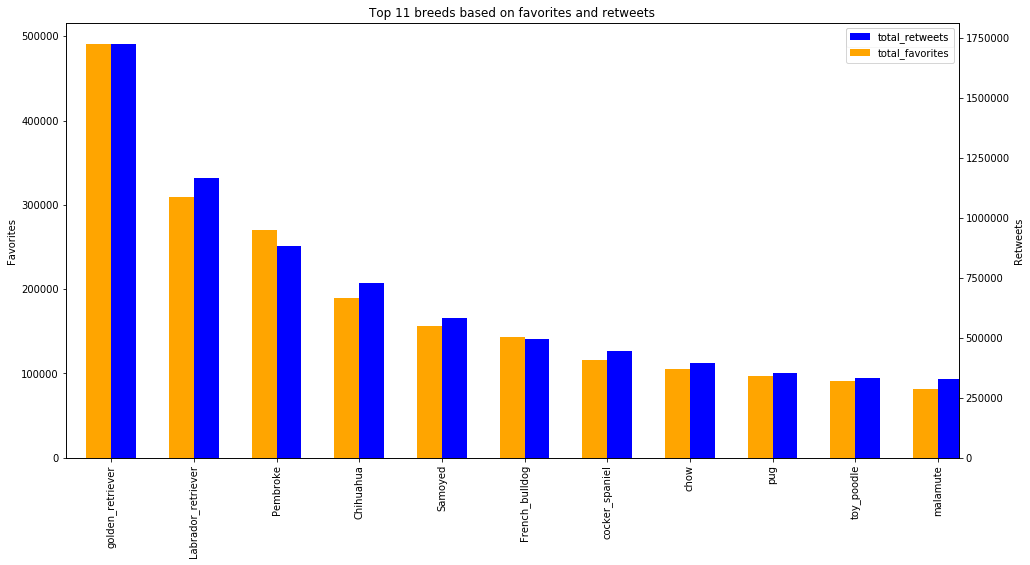

In [117]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


top_10_retweeted_breeds.plot(figsize = (16,8), kind='bar', color='blue', ax=ax1, width=0.3, position=0,  title='Top 11 breeds based on favorites and retweets')
top_10_favorite_breeds.plot(figsize = (16,8), kind='bar', color='orange', ax=ax2, width=0.3, position=1)

ax1.set_ylabel('Favorites')
ax2.set_ylabel('Retweets')

ax1.set_xticklabels(top_10_retweeted_breeds['prediction'])

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=1);

plt.savefig('top_breeds_bar.png', dpi=300, bbox_inches='tight')

## 3. Is there a relationship between favorites and retweets?
The above bar charts suggest that almost same breeds got highest retweets and favorite. It will be interesting to see if there is any correlation between retweets and favorites. 
Here we look at the correlation between retweets and favorites color coded by dog life stage.

In [101]:
df_twitter_archive_master_stage = df_twitter_archive_master[df_twitter_archive_master['life_stage']!='None']

In [102]:
df_twitter_archive_master_stage

,tweet_id,timestamp,source,text,rating_numerator,name,life_stage,prediction,confidence,retweet_count,favorite_count
9,890240255349198849,2017-07-26,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14,Cassie,doggo,Pembroke,0.511319,6489.0,29257.0
12,889665388333682689,2017-07-25,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,13,NaN,puppo,Pembroke,0.966327,8856.0,44080.0
14,889531135344209921,2017-07-24,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,13,Stuart,puppo,golden_retriever,0.953442,1997.0,13949.0
28,886366144734445568,2017-07-15,Twitter for iPhone,This is Roscoe. Another pupper fallen victim t...,12,Roscoe,pupper,French_bulldog,0.999201,2805.0,19408.0
39,884162670584377345,2017-07-09,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,12,Yogi,doggo,German_shepherd,0.707046,2652.0,18755.0
...,...,...,...,...,...,...,...,...,...,...,...
1721,672594978741354496,2015-12-04,Twitter for iPhone,Meet Scott. Just trying to catch his train to ...,9,Scott,pupper,Great_Pyrenees,0.755945,571.0,1254.0
1728,672481316919734272,2015-12-03,Twitter for iPhone,Say hello to Jazz. She should be on the cover ...,12,Jazz,pupper,Border_collie,0.599454,120.0,680.0
1735,672254177670729728,2015-12-03,Twitter for iPhone,This is Rolf. He's having the time of his life...,11,Rolf,pupper,pug,0.979487,694.0,1350.0
1741,672205392827572224,2015-12-03,Twitter for iPhone,This is Opal. He's a Royal John Coctostan. Rea...,9,Opal,pupper,pug,0.003267,1068.0,2115.0


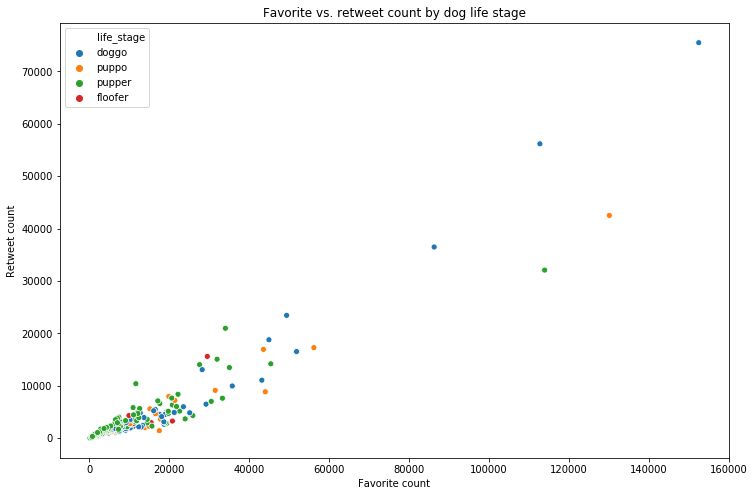

In [116]:
plt.figure(figsize=(12,8)) 
sns.scatterplot(x='favorite_count', y='retweet_count', hue='life_stage', data=df_twitter_archive_master_stage)
plt.title('Favorite vs. retweet count by dog life stage')
plt.xlabel('Favorite count')
plt.ylabel('Retweet count');

plt.savefig('retweet_vs_favorite_scatter.png', dpi=300, bbox_inches='tight')